In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(df['Sex'].unique())

['male' 'female']


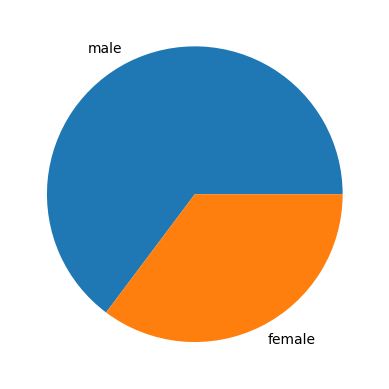

In [7]:
import matplotlib.pyplot as plt
values=df['Sex'].value_counts()

plt.pie(values, labels=['male','female'])
plt.show()

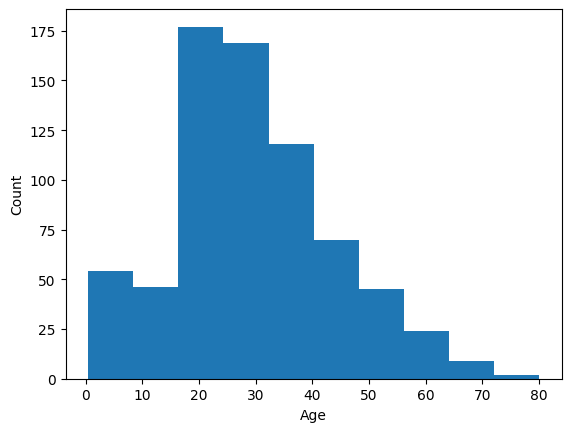

In [8]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

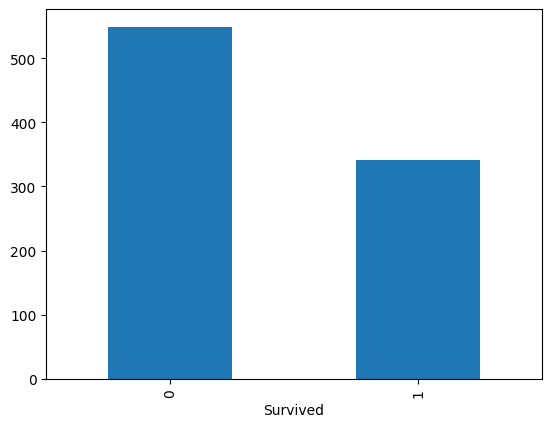

In [9]:
df['Survived'].value_counts().plot(kind='bar')
# plt.bar(['Survived','Dead'])
plt.show()

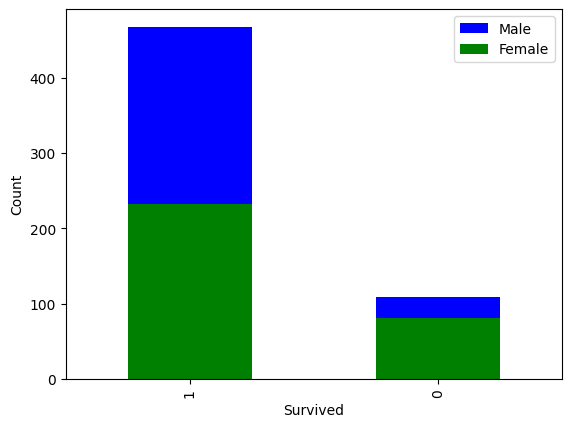

In [10]:
#stacked bar plot for survived and dead based on gender

male=df.query('Sex=="male"')
female=df.query('Sex=="female"')

male['Survived'].value_counts().plot(kind='bar',color='b',stacked=True)
female['Survived'].value_counts().plot(kind='bar',color='g',stacked=True)
plt.legend(['Male','Female'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

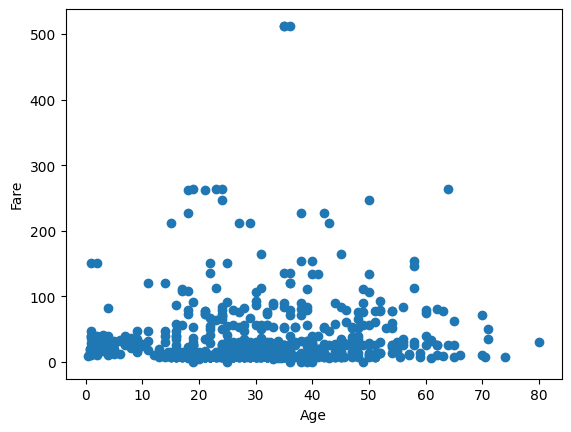

In [11]:
plt.scatter(df['Age'],df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [12]:
#replace missing values in age column with mean age
df['Age'].fillna(df['Age'].mean(),inplace=True)
# df['Age'].fillna(df['Age'].quantile(0.5),inplace=True) #median

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df['Fare_enc']=scaler.fit_transform(df[['Fare']])
df.head(5)

ModuleNotFoundError: No module named 'sklearn'

In [15]:
#one hot encoding for sex column

# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder()

# transformed=encoder.fit_transform(df[['Sex']])

# print(transformed.toarray())

# df.join(transformed)

# df.head(5)



df2=pd.get_dummies(df['Sex'])
df3=pd.concat([df,df2],axis=1)
df3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True


In [16]:
highest_fare=df['Fare'].max()
print(highest_fare)


fares_descending=df.sort_values(by='Fare',ascending=False)
fares_descending.head(1)

512.3292


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [17]:
# num_of_survived=male['Survived'].sum()
# print(num_of_survived)
# num_of_survived=df['Survived'].count()
# print(num_of_survived)

print(male.query('Survived==1')['Survived'].count()/male['Survived'].count()*100)
print(female.query('Survived==1')['Survived'].count()/female['Survived'].count()*100)


18.890814558058924
74.20382165605095
